<a href="https://colab.research.google.com/github/Andreaierardi/Text-Mining-and-Sentiment-Analysis/blob/main/PythonNotebook/emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Emotion detection in song lyrics**

## **Text Mining and Sentiment Analysis Project**
> ## University of Milan - DataScience and Economics

<br>

#### Author : **Andrea Ierardi**
#### Student's ID: 960188
<br>


---
<br>
<br>




## Emotion detection in song lyrics (P6)

Recently, emotion detection in text has received attention in the literature on sentiment analysis. Detecting emotions is important for studying human communication in different domains. Music is typically related to emotions, and song lyrics usually express emotions using different laguage styles. The project aims at studying song lyrics under the emotional profile. In particular, the task of the project is threefold:
1. Create a model to predict emotions in text using available datasets as EmoBank or WASSA-2017 as training sets;
2. Exploit the model to study emotions in song lyrics with the goal of undertanding how and if emotions are correlated with the music genre;
3. Automatically create a playlist based on lyrics given user preferences about music genres and the user current mood.

### Dataset

See EmoBank and WASSA-2017 in the reference list below.
### Evaluation strategy

Cross-validation using the training set
### References

- Binali, H., Wu, C., & Potdar, V. (2010, April). Computational approaches for emotion detection in text. In 4th IEEE International Conference on Digital Ecosystems and Technologies (pp. 172-177). IEEE. [link](https://ieeexplore.ieee.org/abstract/document/5610650)
- Sven Buechel and Udo Hahn. 2017. EmoBank: Studying the Impact of  Annotation Perspective and Representation Format on Dimensional Emotion  Analysis. In EACL 2017 - Proceedings of the 15th Conference of the  European Chapter of the Association for Computational Linguistics.  Valencia, Spain, April 3-7, 2017. Volume 2, Short Papers, pages 578-585. Available: http://aclweb.org/anthology/E17-2092
- The WASSA-2017 Shared Task on Emotion Intensity [webpage](http://saifmohammad.com/WebPages/EmotionIntensity-SharedTask.html) provides a dataset of Tweets annotated with emotions (i.e., anger, fear, joy, sadness) and a measure of intensity of the emotion. 
--- 
<br>
<br>


<br>
<br>


# Load data

In [1]:
import pandas as pd

train_list = ["http://saifmohammad.com/WebDocs/EmoInt%20Train%20Data/anger-ratings-0to1.train.txt","http://saifmohammad.com/WebDocs/EmoInt%20Train%20Data/fear-ratings-0to1.train.txt","http://saifmohammad.com/WebDocs/EmoInt%20Train%20Data/joy-ratings-0to1.train.txt", "http://saifmohammad.com/WebDocs/EmoInt%20Train%20Data/sadness-ratings-0to1.train.txt"]

valid_list = ["http://saifmohammad.com/WebDocs/EmoInt%20Dev%20Data%20With%20Gold/anger-ratings-0to1.dev.gold.txt","http://saifmohammad.com/WebDocs/EmoInt%20Dev%20Data%20With%20Gold/fear-ratings-0to1.dev.gold.txt", "http://saifmohammad.com/WebDocs/EmoInt%20Dev%20Data%20With%20Gold/joy-ratings-0to1.dev.gold.txt", "http://saifmohammad.com/WebDocs/EmoInt%20Dev%20Data%20With%20Gold/sadness-ratings-0to1.dev.gold.txt"]


test_list = ["http://saifmohammad.com/WebDocs/EmoInt%20Test%20Gold%20Data/anger-ratings-0to1.test.gold.txt", "http://saifmohammad.com/WebDocs/EmoInt%20Test%20Gold%20Data/fear-ratings-0to1.test.gold.txt", "http://saifmohammad.com/WebDocs/EmoInt%20Test%20Gold%20Data/joy-ratings-0to1.test.gold.txt", "http://saifmohammad.com/WebDocs/EmoInt%20Test%20Gold%20Data/sadness-ratings-0to1.test.gold.txt"]

In [2]:
import string
import nltk
nltk.download('stopwords')
#ps = nltk.PorterStemmer()
stopwords= nltk.corpus.stopwords.words('english')

def clean(sentence):
    s = "".join(x for x in sentence if x not in string.punctuation)
    temp = s.lower().split(' ')
    temp2 = [x for x in temp if x not in stopwords]
    return temp2

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
def clean_setcol(df):
  df = df.T.reset_index().T.reset_index(drop=True)
  df.columns = ["id","text", "status", "weigth"]
  return df

In [4]:
def generate_train_valid_test(train_list, valid_list, test_list):
  dic = dict()
  cols = ["id", "text", "status", "weigth"]
  train = pd.DataFrame(columns = cols)
  valid = pd.DataFrame(columns = cols)
  test = pd.DataFrame(columns  = cols)

  for name in train_list:
    df = pd.read_csv(name, sep="\t")
    df_clean = clean_setcol(df)
    train = pd.concat([train, df_clean])
  for name in valid_list:
    df = pd.read_csv(name, sep="\t")
    df_clean = clean_setcol(df)
    valid =  pd.concat([valid, df_clean])
  for name in test_list:
    df = pd.read_csv(name, sep="\t")
    df_clean = clean_setcol(df)
    test =  pd.concat([test, df_clean])

  dic["train"] = train.reset_index(drop = True)
  dic["valid"] = valid.reset_index(drop = True)
  dic["test"] = test.reset_index(drop = True)
  print("Get all data")
  return dic

In [5]:
sets = generate_train_valid_test(train_list, valid_list, test_list)

Get all data


In [6]:
sets["train"]

,id,text,status,weigth
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
...,...,...,...,...
3608,40781,@VivienLloyd Thank you so much! Just home - st...,sadness,0.104
3609,40782,Just put the winter duvet on ☃️❄️🌬☔️,sadness,0.104
3610,40783,@SilkInSide @TommyJoeRatliff that's so pretty!...,sadness,0.088
3611,40784,@BluesfestByron second artist announcement loo...,sadness,0.083


In [7]:
sets["valid"]

,id,text,status,weigth
0,10857,@ZubairSabirPTI pls dont insult the word 'Molna',anger,0.479
1,10858,@ArcticFantasy I would have almost took offens...,anger,0.458
2,10859,@IllinoisLoyalty that Rutgers game was an abom...,anger,0.562
3,10860,@CozanGaming that's what lisa asked before she...,anger,0.5
4,10861,Sometimes I get mad over something so minuscul...,anger,0.708
...,...,...,...,...
342,40855,Common app just randomly logged me out as I wa...,sadness,0.833
343,40856,"I'd rather laugh with the rarest genius, in be...",sadness,0.688
344,40857,If you #invest in my new #film I will stop ask...,sadness,0.458
345,40858,"Just watched Django Unchained, Other people ma...",sadness,0.333


In [8]:
sets["test"]

,id,text,status,weigth
0,10941,At the point today where if someone says somet...,anger,0.319
1,10942,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger,0.144
2,10943,This game has pissed me off more than any othe...,anger,0.898
3,10944,@spamvicious I've just found out it's Candice ...,anger,0.271
4,10945,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.646
...,...,...,...,...
3137,41528,Why does Candice constantly pout #GBBO 💄😒,sadness,0.396
3138,41529,"@redBus_in #unhappy with #redbus CC, when I ta...",sadness,0.604
3139,41530,"@AceOperative789 no pull him afew weeks ago, s...",sadness,0.479
3140,41531,I'm buying art supplies and I'm debating how s...,sadness,0.375


In [9]:
#for setname in sets:
 #  sets[setname]["text"] = sets[setname]["text"].apply(clean)

In [10]:
sets["train"]["text"][0]

'How the fu*k! Who the heck! moved my fridge!... should I knock the landlord door. #angry #mad ##'

<br>
<br>


# **Song Lyrics Analysis**

This dataset provides a list of lyrics from 1950 to 2019describing music metadata as sadness, danceability, loudness, acousticness, etc.  We also providesome informations as lyrics which can be used to natural language processing.  The audio data wasscraped using Echo Nest API integrated engine with spotipy Python’s package.  The spotipy APIpermits the user to search for specific genres, artists,songs, release date, etc.  To obtain the lyricswe used the Lyrics Genius API as baseURL for requesting data based on the song title and artistname

In [11]:
songs = pd.read_csv("https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/036e1862-4d9b-4ea8-b762-7ae3282ba2c3")

In [12]:
songs.head(10)

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.000598,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.081132,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.001350,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0
5,14,perry como,round and round (with mitchell ayres and his o...,1950,pop,convoy light dead ahead merchantmen trump dies...,98,0.001053,0.420685,0.001053,0.074078,0.001053,0.001053,0.001053,0.001053,0.001053,0.001053,0.001053,0.172173,0.001053,0.001053,0.128292,0.001053,0.689158,0.685588,0.898594,0.000000,0.768137,0.549535,violence,1.0
6,15,freestyle,opm medley: when i met you,1950,pop,piece mindin world knowin life come bring give...,179,0.000483,0.000483,0.371817,0.040712,0.000483,0.000483,0.000483,0.384703,0.000483,0.000483,0.000483,0.044355,0.000483,0.000483,0.000483,0.123150,0.368569,0.633695,0.435742,0.000000,0.282770,0.486470,world/life,1.0
7,17,johnny mathis,it's not for me to say,1950,pop,care moment hold fast press lips dream heaven ...,21,0.002506,0.002506,0.336056,0.002506,0.002506,0.002506,0.176861,0.002506,0.002506,0.002506,0.002506,0.386887,0.002506,0.002506,0.062602,0.002506,0.379400,0.529421,0.925703,0.000072,0.373454,0.192167,world/life,1.0
8,20,stélios kazantzídis,klapse me mana klapse me,1950,pop,lonely night surround power read mind hour nig...,30,0.083537,0.002024,0.002024,0.248273,0.002024,0.002024,0.401801,0.167783,0.002024,0.002024,0.002024,0.002024,0.002024,0.002024,0.002024,0.031600,0.496372,0.666180,0.974900,0.000014,0.621805,0.400382,romantic,1.0
9,23,stélios kazantzídis,finito la mouzika,1950,pop,tear heart seat stay awhile tear heart game st...,61,0.001120,0.102548,0.001120,0.053944,0.001120,0.001120,0.001120,0.091572,0.001120,0.001120,0.105752,0.001120,0.001120,0.001120,0.630507,0.001120,0.662082,0.643130,0.983936,0.000175,0.744435,0.413395,sadness,1.0


In [13]:
songs= songs.drop(songs.columns[6:], axis=1).drop("Unnamed: 0", axis=1)

In [14]:
songs

,artist_name,track_name,release_date,genre,lyrics
0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...
1,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...
2,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...
3,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...
4,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...
...,...,...,...,...,...
28367,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...
28368,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...
28369,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...
28370,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...


In [15]:
def predict_songs(model, songs, name='NN'):
  msg = pd.DataFrame(columns = ["text"],
                   data    = list(songs.lyrics)
                   )
  msg_trans = pipe_bi.transform(msg)
  pred = model.predict(msg_trans)
  if(name == 'NN'):
    pred = le.inverse_transform([np.argmax(i) for i in pred])
  else:
    pred = le.inverse_transform(pred)

  
  predDF = pd.DataFrame(pred,columns=["pred"])
  songs_emotion= pd.concat([predDF,songs],axis = 1)
  emo_distr = songs_emotion.groupby("pred")["pred"].count()
  sns.set(rc={'figure.figsize':(25,10)}, style="white", font_scale=1.5)
  ax = sns.barplot(x = emo_distr.index, y = emo_distr.values)
  ax.set(title = "Emotions Distribution for "+name, xlabel = "Emotion",  ylabel = "Number")
  return songs_emotion
  

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def get_genre_emo(songs_emotion):
  songs_emo_genre = songs_emotion[["pred","genre"]]
  cnt_songs_emo_genre = songs_emo_genre.groupby(["genre","pred"])[["pred"]].count()
  cnt_songs_emo_genre.columns= ["count"]
  cnt_songs_emo_genre.reset_index(inplace=True)
  cnt_songs_emo_genre['genre-emo'] = cnt_songs_emo_genre['genre'].map(str) + '-' + cnt_songs_emo_genre['pred'].map(str) 

  cnt_songs_emo_genre.drop(["genre","pred"],axis=1,inplace=True)
  cnt_songs_emo_genre.sort_values(by=["count"],ascending=False, inplace=True)

  sns.set(rc={'figure.figsize':(25,10)}, style="white", font_scale=1.5)
  sns.barplot(data=cnt_songs_emo_genre.head(10), x= cnt_songs_emo_genre["genre-emo"].head(10),y = cnt_songs_emo_genre["count"].head(10))

<br>
<br>


# **Pre-processing data**# 

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.utils import shuffle

x_train = sets["train"].drop(["id","status"],axis=1)
y_train = sets["train"]["status"]

x_train, y_train =  shuffle(x_train, y_train)
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [18]:
x_train

,text,weigth
0,@WestermannNina xDD it's a song that can not b...,0.542
1,"bad news fam, life is still hard and awful #de...",0.812
2,The moment of the day when you have to start t...,0.854
3,@TheSandraGal Glad to see that you're having f...,0.796
4,"@SiobhanSynnot Oh, good God. Quentin Letts is...",0.5
...,...,...
3608,Rojo is hilarious,0.6
3609,Had a great time at Skywalkers open gym tonigh...,0.78
3610,Overtime... #TeamNA #WCH2016,0.348
3611,When someone tells you they're going to 'tear ...,0.354


In [19]:
y_train

0       sadness
1       sadness
2       sadness
3           joy
4         anger
         ...   
3608        joy
3609        joy
3610       fear
3611       fear
3612        joy
Name: status, Length: 3613, dtype: object

In [20]:
x_valid = sets["valid"].drop(["id","status"], axis=1)
y_valid = sets["valid"]["status"]

x_valid, y_valid =  shuffle(x_valid, y_valid)

x_valid = x_valid.reset_index(drop=True)
y_valid = y_valid.reset_index(drop=True)

In [21]:
x_test  = sets["test"].drop(["id","status"], axis=1)
y_test = sets["test"]["status"]

x_test, y_test =  shuffle(x_test, y_test)
x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [22]:
print("Shapes")
print("Train")
print("x_train",x_train.shape)
print("y_train",y_train.shape)
print("")
print("Valid")
print("x_valid",x_valid.shape)
print("y_valid",y_valid.shape)
print("")
print("Test")
print("x_test",x_test.shape)
print("y_test",y_test.shape)

Shapes
Train
x_train (3613, 2)
y_train (3613,)

Valid
x_valid (347, 2)
y_valid (347,)

Test
x_test (3142, 2)
y_test (3142,)


In [23]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

# Custom Transformer (Inheriting from classes)
class CleanText( BaseEstimator, TransformerMixin ):
    
   
    def __init__( self, lang = "english"):
        self.lang = lang
        self.stemmer = SnowballStemmer(self.lang)
    
       
    def fit( self, X, y = None ):
        return self 
    
   
    def clean( self, x ):
        words   = [self.stemmer.stem(word) for word in word_tokenize(x.lower()) if word.isalpha() and word not in stopwords.words("english")]
        return " ".join(words)
    
   
    def transform( self, X, y = None ):
        return X["text"].apply(self.clean)

In [24]:
class CustomFeatures( BaseEstimator, TransformerMixin ):
    
    def __init__( self ):
        return
    
    def fit( self, X, y = None ):
        return self 
        
    def transform( self, X, y = None ):
        f           = pd.DataFrame()
        f['len']    = X['text'].str.len()
        f['digits'] = X['text'].str.findall(r'\d').str.len()
        f['punct']  = X['text'].str.findall(r'[^a-zA-Z\d\s:]').str.len()
        return f[['len','digits','punct']]

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
nltk.download('punkt')


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler


pipe = Pipeline([("extract", FeatureUnion([("terms", Pipeline([('clean', CleanText()), 
                                                               ('tfidf', TfidfVectorizer())])),
                                           ("custom", CustomFeatures())])),
                 ("select", SelectKBest(score_func = chi2)),
                 ("scale", StandardScaler(with_mean = False))])



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [26]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('extract',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('terms',
                                                 Pipeline(memory=None,
                                                          steps=[('clean',
                                                                  CleanText(lang='english')),
                                                                 ('tfidf',
                                                                  TfidfVectorizer(analyzer='word',
                                                                                  binary=False,
                                                                                  decode_error='strict',
                                                                                  dtype=<class 'numpy.float64'>,
                                                                                  encoding='utf-8',
                     

In [27]:
X_train = pipe.fit_transform(x_train,y_train)

In [28]:
X_valid = pipe.transform(x_valid)
X_test = pipe.transform(x_test)

In [29]:
# extract features
pipe_extract = FeatureUnion([("terms", Pipeline([('clean', CleanText()), 
                                                 ('tfidf', TfidfVectorizer())])),
                             ("custom", CustomFeatures())])

# select and scale features
pipe_select_scale = Pipeline([("select", SelectKBest(score_func = chi2)),
                              ("scale", StandardScaler(with_mean = False))])


# extract features
# you can also use bi-grams:
X_extract = pipe_extract.set_params(terms__tfidf__ngram_range = (1,2)).fit_transform(x_train, y_train)

X_extract_test = pipe_extract.set_params(terms__tfidf__ngram_range = (1,2)).transform(x_test)

print(X_extract)

X_select_scale = pipe_select_scale.set_params(select__k = 500).fit_transform(X_extract, y_train)
print(X_select_scale)

X_select_scale_test = pipe_select_scale.set_params(select__k = 500).transform(X_extract_test)
print(X_select_scale)

  (0, 23497)	0.30810009031918784
  (0, 23508)	0.40383451272214116
  (0, 28045)	0.29943741586124833
  (0, 28209)	0.40383451272214116
  (0, 28210)	0.40383451272214116
  (0, 29023)	0.40383451272214116
  (0, 29024)	0.40383451272214116
  (0, 29343)	57.0
  (0, 29345)	5.0
  (1, 1213)	0.17906372190428668
  (1, 1215)	0.2712878243658386
  (1, 1644)	0.26164549093824646
  (1, 1757)	0.1776669646086493
  (1, 1759)	0.26164549093824646
  (1, 1938)	0.17906372190428668
  (1, 1955)	0.24805538526251328
  (1, 6125)	0.16251763246466405
  (1, 6126)	0.24288866687677318
  (1, 8083)	0.26164549093824646
  (1, 8084)	0.26164549093824646
  (1, 11107)	0.20606612209771472
  (1, 11108)	0.26164549093824646
  (1, 14215)	0.1629557736668282
  (1, 14264)	0.26164549093824646
  (1, 17283)	0.20606612209771472
  :	:
  (3612, 15)	0.21298835207352637
  (3612, 16)	0.21298835207352637
  (3612, 2489)	0.14231876369232255
  (3612, 2512)	0.2236579581243904
  (3612, 5151)	0.21298835207352637
  (3612, 5152)	0.21298835207352637
  (3612, 

In [30]:
# extract features
pipe_bi = Pipeline([("extract", FeatureUnion([("terms", Pipeline([('clean', CleanText()), 
                                                               ('tfidf', TfidfVectorizer(ngram_range = (1,2)))])),
                                           ("custom", CustomFeatures())])),
                 ("select", SelectKBest(score_func = chi2,k = 500)),
                 ("scale", StandardScaler(with_mean = False))])


In [31]:
X_train_bi =pipe_bi.fit_transform(x_train,y_train)
X_valid_bi = pipe_bi.transform(x_valid)
X_test_bi = pipe_bi.transform(x_test)

In [32]:
#x_train.to_pickle("X_train")
#y_train.to_pickle("y_train")


In [33]:
#import joblib 
#joblib.dump(pipe_bi, 'preprocess.pkl', compress = 1)

In [34]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [35]:
vocab_size = 10000
embedding_dim = 16
max_length = 30
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = x_train.size

training_sentences = x_train["text"]
valid_sequences = x_valid["text"]
testing_sentences = x_test["text"]

In [36]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

valid_sequences = tokenizer.texts_to_sequences(valid_sequences)
valid_padded = pad_sequences(valid_sequences,maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [37]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y_train_enc = le.fit_transform(y_train)
y_valid_enc = le.transform(y_valid)
y_test_enc = le.transform(y_test)


In [38]:
#np.save('classes.npy', le.classes_)

In [39]:
#!pip install np_utils

In [40]:
import numpy as np
from keras.utils import np_utils

no_of_classes = len(np.unique(y_train))
y_train_seq = np_utils.to_categorical(y_train_enc,no_of_classes)
y_valid_seq = np_utils.to_categorical(y_valid_enc,no_of_classes)
y_test_seq= np_utils.to_categorical(y_test_enc,no_of_classes)

In [41]:
import numpy as np
X_train_seq = np.array(training_padded)
y_train_seq = np.array(y_train_seq)


X_valid_seq = np.array(valid_padded)
y_valid_seq = np.array(y_valid_seq)


X_test_seq = np.array(testing_padded)
y_test_seq = np.array(y_test_seq)

<br>
<br>


# **Classification Problem**

In [ ]:
f1_score_dict = dict()

<br>
<br>


## LogisticRegression

In [ ]:
# Logistic Model
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from sklearn.linear_model import LogisticRegression
pipe_logistic = Pipeline([('pre_process', pipe),
                          ('classify', LogisticRegression(max_iter=10000, tol=0.1, solver='lbfgs'))])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pipe_logistic.fit(x_train, y_train_enc)

Pipeline(memory=None,
         steps=[('pre_process',
                 Pipeline(memory=None,
                          steps=[('extract',
                                  FeatureUnion(n_jobs=None,
                                               transformer_list=[('terms',
                                                                  Pipeline(memory=None,
                                                                           steps=[('clean',
                                                                                   CleanText(lang='english')),
                                                                                  ('tfidf',
                                                                                   TfidfVectorizer(analyzer='word',
                                                                                                   binary=False,
                                                                                                   decode_error='st

In [ ]:
from sklearn.metrics import f1_score
y_pred = pipe_logistic.predict(x_test)
f1_score(y_test_enc, y_pred, average="weighted")

0.3238834038037356

In [ ]:
lg = LogisticRegression(max_iter=10000, tol=0.1, solver='lbfgs')

In [ ]:
lg.fit(X_train_seq,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import f1_score
y_pred = lg.predict(X_test_seq)
f1_score(y_pred, y_test, average="weighted")

0.4416178374117312

In [ ]:
lg.fit(X_train_bi,y_train_enc)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import f1_score
y_pred = lg.predict(X_test_bi)
f1_score(y_test_enc, y_pred, average="weighted")

0.8162040689249578

In [ ]:
# Select best hyperparameters by cross validation
from sklearn.model_selection import GridSearchCV
import numpy as np

# Model
logistic = LogisticRegression(max_iter=10000, tol=0.1, solver='lbfgs')

param_logistic = {
    'C': np.logspace(-4, 4, 4),
}


cv_logistic = GridSearchCV(logistic, param_logistic, cv=10, scoring="f1_weighted")
cv_logistic.fit(X_train_bi, y_train_enc)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.1, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 4.64158883e-02, 2.15443469e+01, 1.00000000e+04])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=0)

In [ ]:
print(cv_logistic.best_score_)

0.875943403830109


In [ ]:
from sklearn.metrics import f1_score
y_pred = cv_logistic.predict(X_test_bi)
print(f1_score(y_test_enc, y_pred, average="weighted"))

f1_score_dict["Logistic"] = f1_score(y_test_enc, y_pred, average="weighted")

0.8263058659866391


In [ ]:
import pickle
filename = 'logisticCV.sav'
pickle.dump(cv_logistic, open(filename, 'wb'))

In [ ]:
import pickle
cv_logistic = pickle.load(open('logisticCV.sav','rb'))

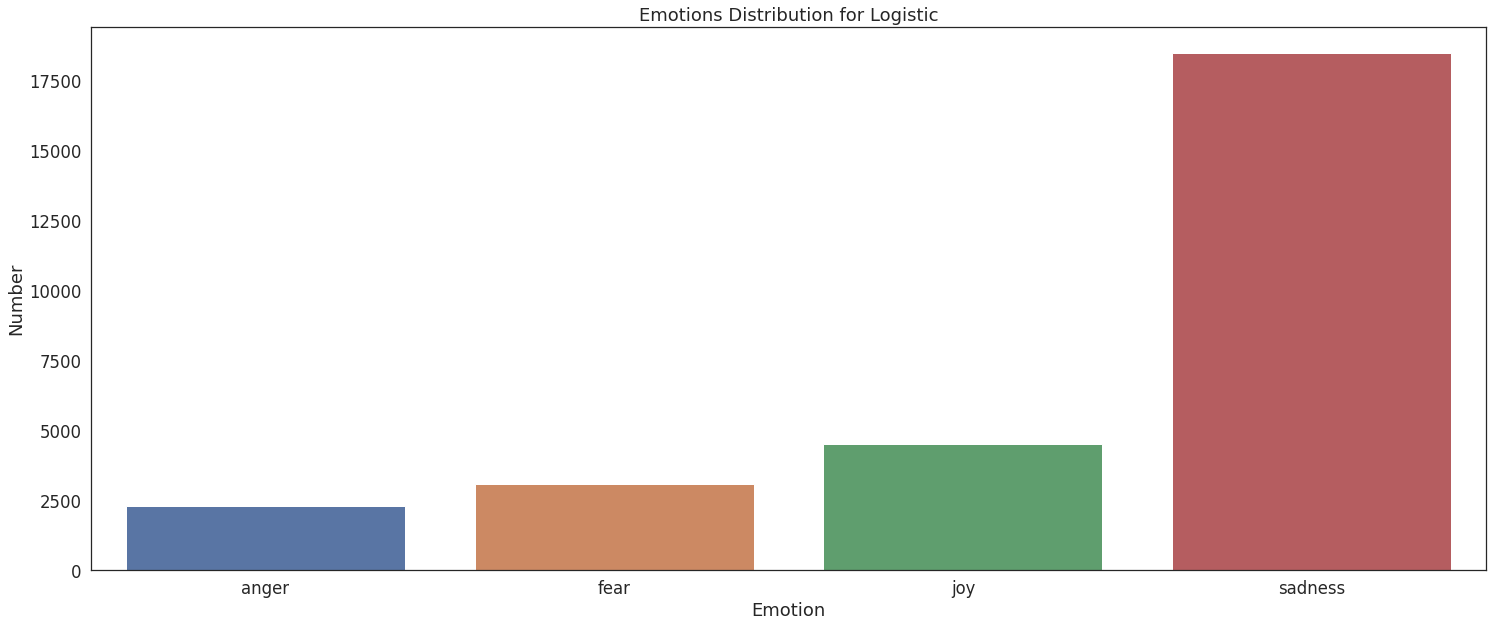

In [ ]:
songs_emotion_LR = predict_songs(cv_logistic, songs, "Logistic")

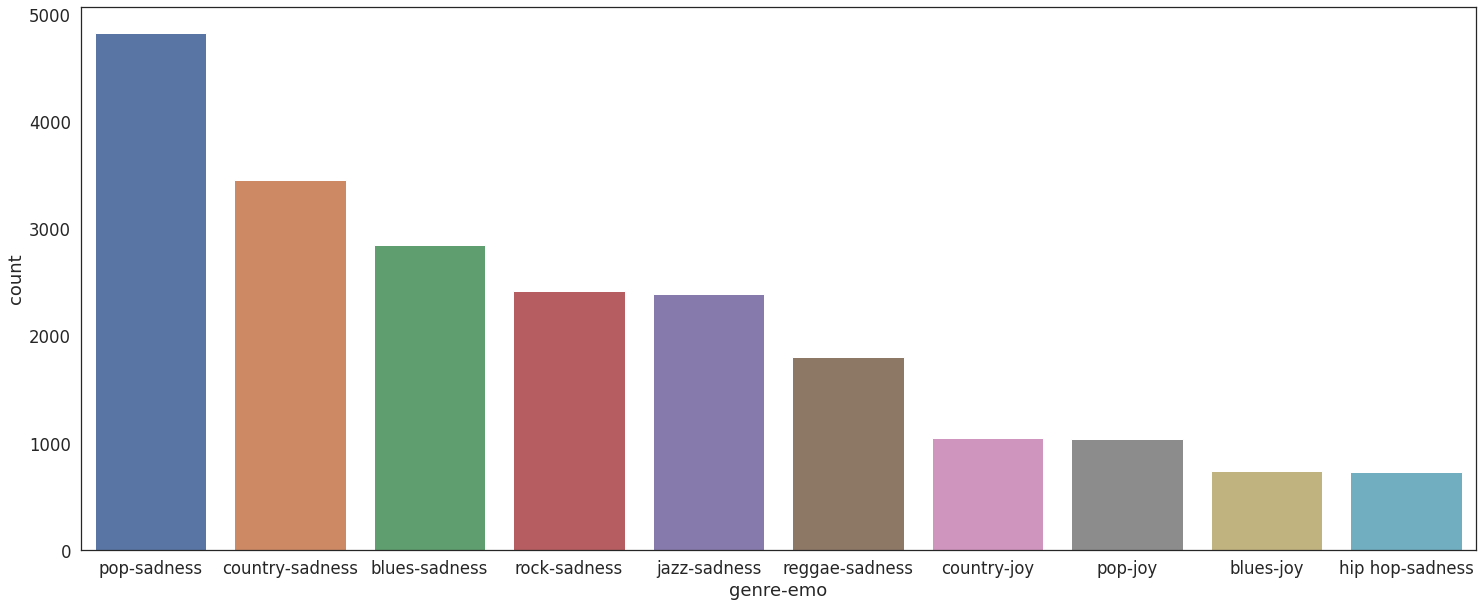

In [ ]:
get_genre_emo(songs_emotion_LR)

<br> 
<br>

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score


rf =  RandomForestClassifier(n_estimators=100,max_depth=None)

In [ ]:
pipe_rf = Pipeline([('pre_process', pipe),
                          ('classify', rf)])

In [ ]:
pipe_rf.fit(x_train,y_train_enc)
y_pred = pipe_rf.predict(x_test)
f1_score(y_test_enc, y_pred, average="weighted")

0.33694424346207225

In [ ]:
rf.fit(X_train_seq, y_train_enc)
y_pred = rf.predict(X_test_seq)
f1_score(y_test_enc, y_pred, average="weighted")


0.258506907560083

In [ ]:
rf.fit(X_train_bi,y_train_enc)
y_pred = rf.predict(X_test_bi)
f1_score(y_test_enc, y_pred, average="weighted")



0.8052950377742979

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV

calibrated_forest = CalibratedClassifierCV(base_estimator=RandomForestClassifier())
param_grid = {
    'base_estimator__max_depth': [2, 4, 6, 8],
'base_estimator__n_estimators':[10,25,50,75,100],
'base_estimator__criterion':['gini','entropy'],
'base_estimator__bootstrap':[True,False],
'base_estimator__max_samples':[0.1,0.3,0.5,0.7,1]
    }
search = GridSearchCV(calibrated_forest, param_grid, cv=5)
search.fit(X_train_bi, y_train_enc)
cv_rf = GridSearchCV(cv=5,
             estimator=CalibratedClassifierCV(...),
             param_grid= param_grid)

In [ ]:
y_pred = search.predict(X_test_bi)
f1_score(y_test_enc, y_pred, average="weighted")

0.7671508251179615

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Pipe RF
pipe_rf = Pipeline([('select_scale', pipe_select_scale),
                    ('classify', RandomForestClassifier())])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_rf = {
    'classify__n_estimators': [100, 200],
    'select_scale__select__k': [600, 1000]
}

cv_rf = GridSearchCV(pipe_rf, param_rf, cv=10, scoring='f1_weighted')
cv_rf.fit(X_extract, y_train_enc)
print(cv_rf.best_score_)



0.821314975895889


In [ ]:
y_pred = cv_rf.predict(X_extract_test)
f1_score(y_test_enc, y_pred,average="weighted")

0.810269003531265

In [ ]:
# Model
rf = RandomForestClassifier(n_jobs=-1)

param_rf = {
    'n_estimators': [10,50,100, 200,500],
    'criterion': ['gini','entropy'],
    'min_weight_fraction_leaf': [0,0.1,0.3,0.5],
    'bootstrap':[True,False],
    'max_samples':[0.1,0.3,0.5,0.7,1],
    'max_depth': [2, 4, 6, 8, 20, 50,100],

    }


cv_rf = GridSearchCV(rf, param_rf, cv=10, scoring="f1_weighted")
cv_rf.fit(X_train_bi, y_train_enc)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              o...
                                              warm_start=False),

In [ ]:
# final evaluation
y_pred = cv_rf.predict(X_test_bi)
f1_score(y_test_enc, y_pred,average="weighted")

0.8084650212209826

In [ ]:
f1_score_dict['RandomForest'] = f1_score(y_test_enc, y_pred,average="weighted")

In [ ]:
import pickle
filename = 'RandomForestCV.sav'
pickle.dump(cv_rf, open(filename, 'wb'))

In [ ]:
import pickle
cv_rf = pickle.load(open('RandomForestCV.sav','rb'))

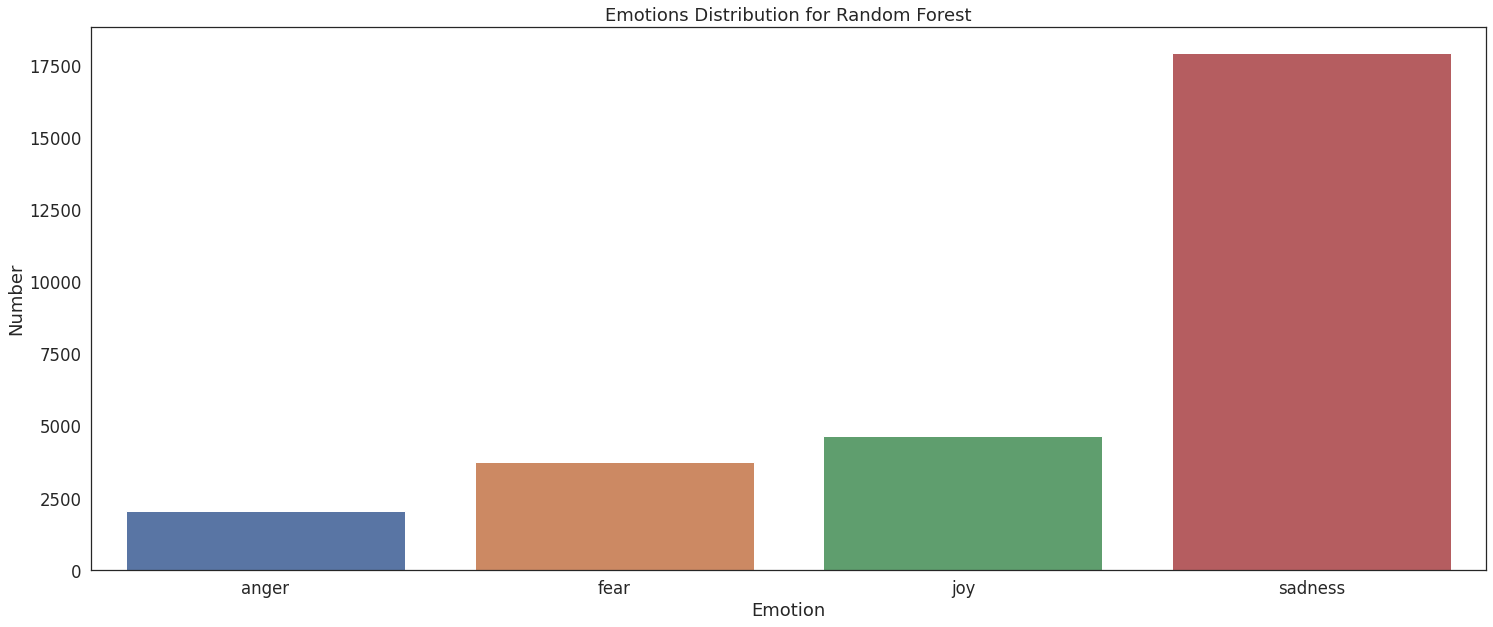

In [ ]:
songs_emotion_RF = predict_songs(cv_rf, songs, "Random Forest")

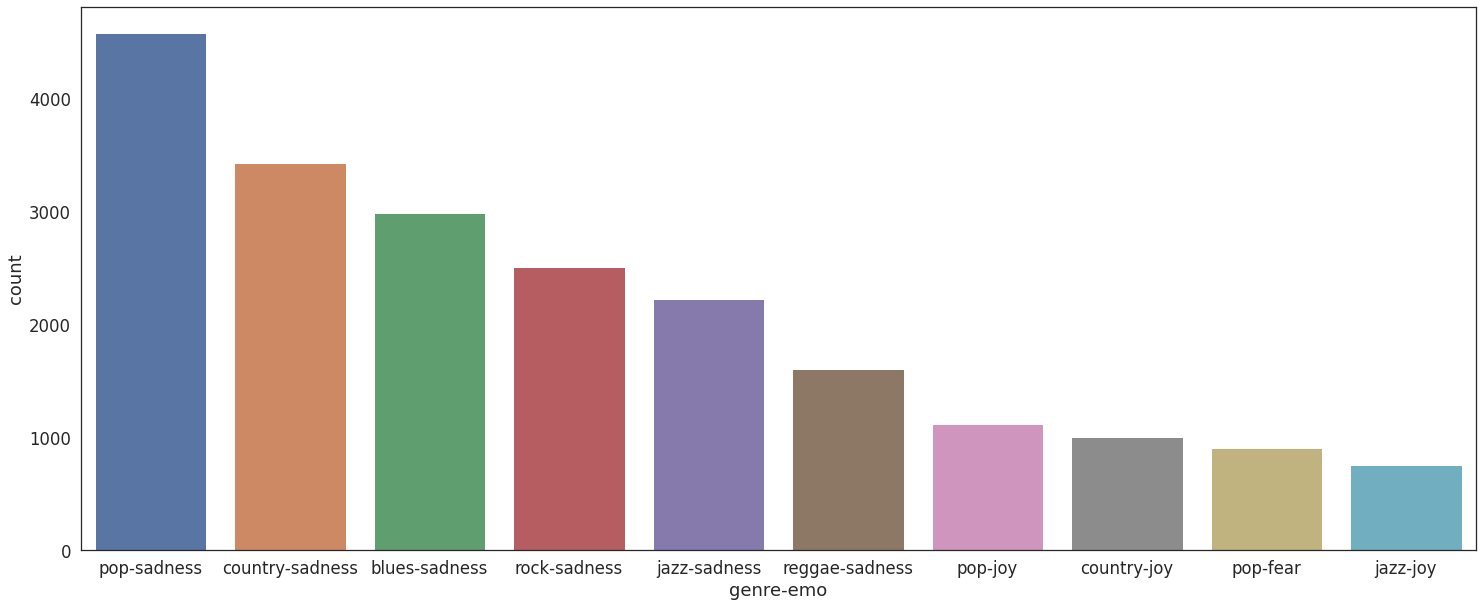

In [ ]:
get_genre_emo(songs_emotion_RF)

<br>
<br>

## Multi-layer Perceptron (MLP) Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
import nltk
nltk.download('punkt')
  
mlp = MLPClassifier(hidden_layer_sizes=(8,6,1), max_iter=300,activation = 'tanh',solver='adam',random_state=123)
pipe_nn = Pipeline(steps=[('pre',pipe),('mlpc', mlp)])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
pipe_nn.fit(x_train,y_train_enc)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('pre',
                 Pipeline(memory=None,
                          steps=[('extract',
                                  FeatureUnion(n_jobs=None,
                                               transformer_list=[('terms',
                                                                  Pipeline(memory=None,
                                                                           steps=[('clean',
                                                                                   CleanText(lang='english')),
                                                                                  ('tfidf',
                                                                                   TfidfVectorizer(analyzer='word',
                                                                                                   binary=False,
                                                                                                   decode_error='strict',
 

In [ ]:
# final evaluation
from sklearn.metrics import f1_score


y_pred = pipe_nn.predict(x_test)
f1_score(y_test_enc, y_pred,average="weighted")

0.28892880363373086

In [ ]:
mlp.fit(X_train_bi,y_train_enc)
y_pred = mlp.predict(X_test_bi)
f1_score(y_test_enc, y_pred , average="weighted")

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.5359985029439902

0.16660102421702833

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Select best hyperparameters by cross validation
from sklearn.model_selection import GridSearchCV
import numpy as np

from sklearn.metrics import f1_score

# Pipe NB
model = MultinomialNB()

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_nb = {
    'alpha': [0.5, 1, 10]
  }

cv_nb = GridSearchCV(model, param_nb, cv=10, scoring='f1_weighted')
cv_nb.fit(X_train_bi, y_train_enc)
print(cv_nb.best_score_)


# fitting
model.fit(X_train_bi, y_train_enc)

# final evaluation
y_pred = model.predict(X_test_bi)
f1_score(y_test_enc, y_pred, average="weighted")

0.8683519823188884


0.8031103961025209

In [ ]:
y_pred = cv_nb.predict(X_test_bi)
f1_score(y_test_enc, y_pred, average="weighted")
f1_score_dict['MLP'] = f1_score(y_test_enc, y_pred, average="weighted")

In [ ]:
import pickle
filename = 'MLP.sav'
pickle.dump(cv_nb, open(filename, 'wb'))

In [ ]:
import pickle
filename = 'MLP.sav'
cv_mlp = pickle.load(open(filename, 'rb'))

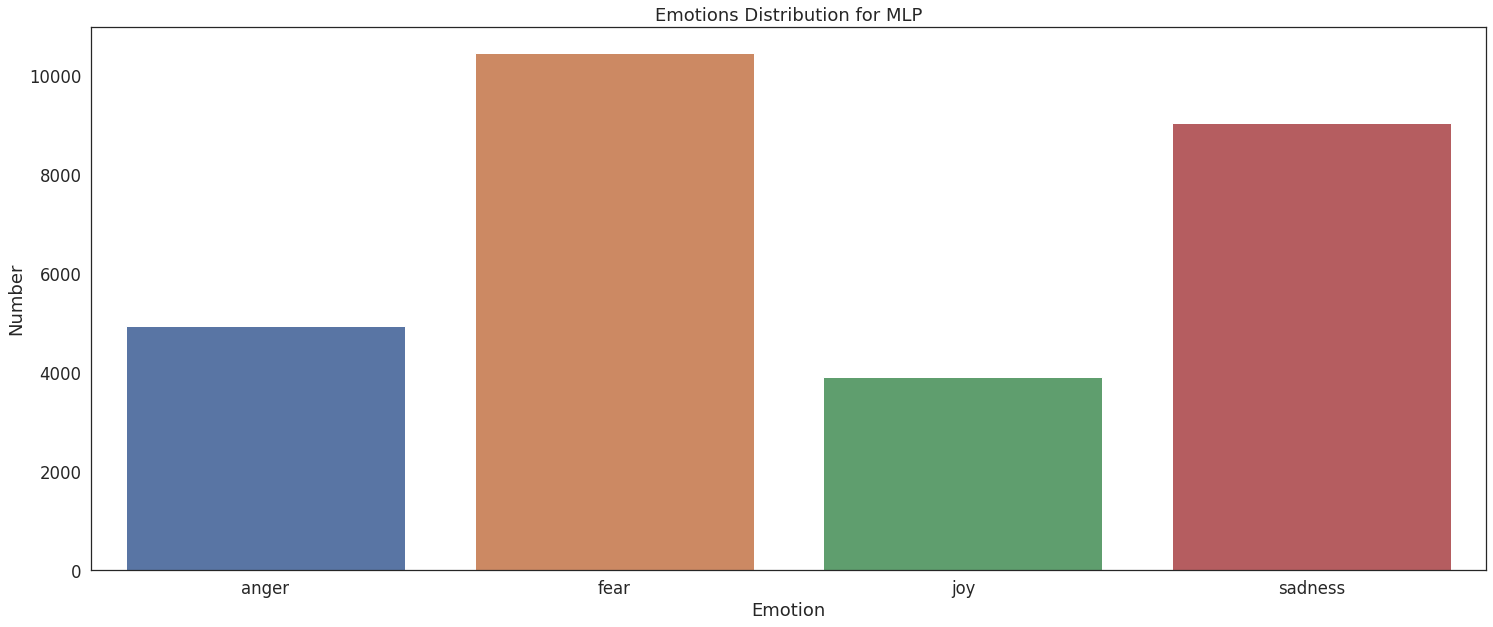

In [ ]:
songs_emotion_MLP = predict_songs(cv_mlp, songs, "MLP")

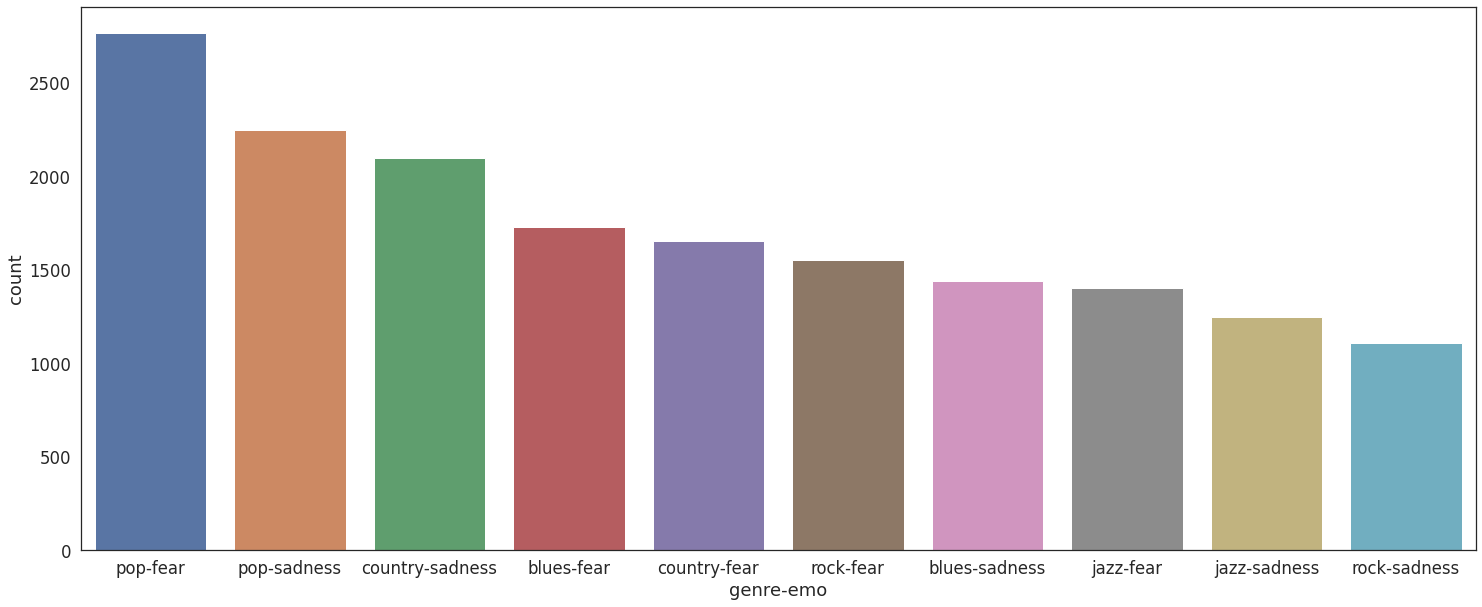

In [ ]:
get_genre_emo(songs_emotion_MLP)

<br>
<br>

## Neural Networks

In [42]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense


#pipe_nn = Pipeline([('pre_process', pipe)])

In [43]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  


<br>
<br>

### Dense Neural Networks

In [44]:
def create_NN(X):
  model = Sequential()
  model.add(Dense(12, input_dim=X.shape[1], activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(4, activation='softmax'))
  # compile the keras model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model 

In [45]:
def create_NN_16_8(X):
  model = Sequential()
  model.add(Dense(16, input_dim=X.shape[1], activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(4, activation='softmax'))
  # compile the keras model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model 

In [46]:
def create_NN_32_16(X):
  model = Sequential()
  model.add(Dense(32, input_dim=X.shape[1], activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(4, activation='softmax'))
  # compile the keras model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model 

In [47]:
nn = create_NN(X_train_seq)
history1 = nn.fit(X_train_seq, y_train_seq, validation_data=(X_valid_seq, y_valid_seq) , verbose=0,epochs=30, batch_size=10)


In [48]:
_, accuracy = nn.evaluate(X_test_seq, y_test_seq)
print('Accuracy: %.2f' % (accuracy*100))

99/99 [==============================] - 0s 921us/step - loss: 2.0872 - accuracy: 0.3129
Accuracy: 31.29


In [49]:
nn = create_NN(X_train_bi)
history1 = nn.fit(X_train_bi, y_train_seq, validation_data=(X_valid_bi, y_valid_seq) ,epochs=50, verbose=0, batch_size=512)


In [ ]:
_, accuracy = nn.evaluate(X_test_bi, y_test_seq)
print('Accuracy: %.2f' % (accuracy*100))

99/99 [==============================] - 0s 1ms/step - loss: 0.6992 - accuracy: 0.8173
Accuracy: 81.73


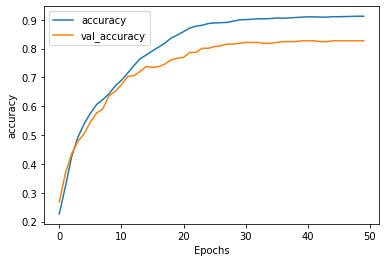

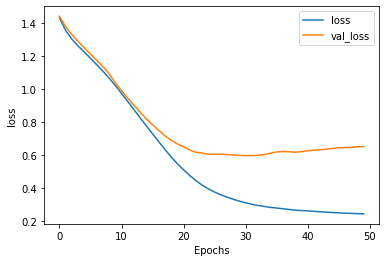

In [ ]:
plot_graphs(history1, "accuracy")
plot_graphs(history1, "loss")

In [50]:
nn_32_16 = create_NN_32_16(X_train_bi)
history2 = nn_32_16.fit(X_train_bi, y_train_seq, epochs=50, verbose=0, batch_size=2048,validation_data=(X_valid_bi, y_valid_seq))


In [ ]:
_, accuracy = nn_32_16.evaluate(X_test_bi, y_test_seq)
print('Accuracy: %.2f' % (accuracy*100))

99/99 [==============================] - 0s 1ms/step - loss: 0.7433 - accuracy: 0.8014
Accuracy: 80.14


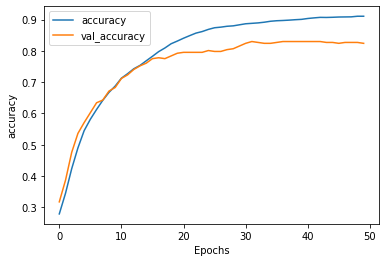

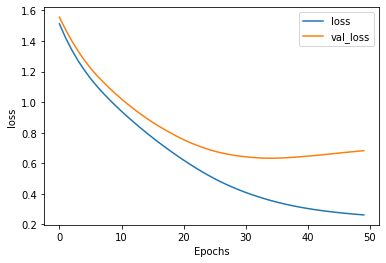

In [ ]:
plot_graphs(history2, "accuracy")
plot_graphs(history2, "loss")

In [51]:
nn_16_8 = create_NN_16_8(X_train_bi)
history3 = nn_16_8.fit(X_train_bi, y_train_seq, epochs=50, batch_size=512,verbose = 0,validation_data=(X_valid_bi, y_valid_seq))


In [ ]:
_, accuracy = nn_16_8.evaluate(X_test_bi, y_test_seq)
print('Accuracy: %.2f' % (accuracy*100))

99/99 [==============================] - 0s 1ms/step - loss: 0.7291 - accuracy: 0.8151
Accuracy: 81.51


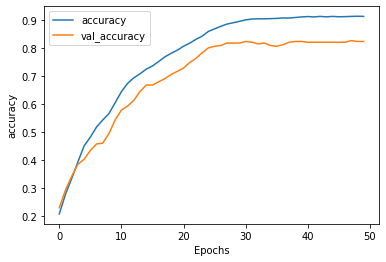

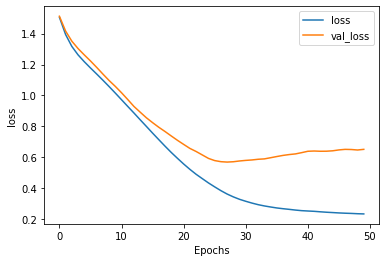

In [ ]:
plot_graphs(history3, "accuracy")
plot_graphs(history3, "loss")

<br>
<br>

### Neural Networks with Embeddings

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer

embedding_dim = 50 
maxlen= 100
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train["text"])
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           541750    
_________________________________________________________________
flatten (Flatten)            (None, 5000)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                50010     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 591,771
Trainable params: 591,771
Non-trainable params: 0
_________________________________________________________________


In [53]:
embedding_dim = 15
maxlen= 30

def create_NN_emb(X):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=X.shape[1]),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])  
  return model 

In [ ]:
nn_emb = create_NN_emb(X_train_bi)
history_emb = nn_emb.fit(X_train_seq, y_train_seq, epochs=50, batch_size=128,verbose =0,validation_data=(X_valid_seq, y_valid_seq))


In [ ]:
_, accuracy = nn_emb.evaluate(X_test_seq, y_test_seq)
print('Accuracy: %.2f' % (accuracy*100))

99/99 [==============================] - 0s 982us/step - loss: 0.7921 - accuracy: 0.7377
Accuracy: 73.77


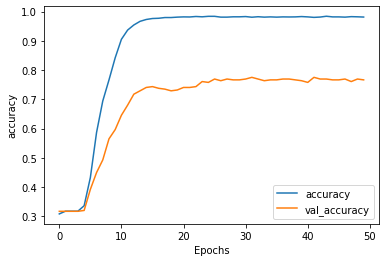

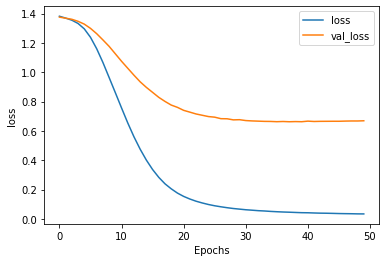

In [ ]:
plot_graphs(history_emb, "accuracy")
plot_graphs(history_emb, "loss")

<br>
<br>

### Neural Networks Feed Forward

In [ ]:
def createNN_FF(X):
  model = tf.keras.Sequential([
                             tf.keras.layers.Input(shape = X.shape[1]),
          tf.keras.layers.Dense(16, activation = "relu"),
          tf.keras.layers.Dense(4, activation='softmax')
          ])
  model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])
  return model 

In [ ]:
nn_ff = createNN_FF(X_train_bi)
history_ff = nn_ff.fit(X_train_bi, y_train_seq, epochs=50, batch_size=512,verose = 0,validation_data=(X_valid_bi, y_valid_seq), verbose=2)


In [ ]:
_, accuracy = nn_ff.evaluate(X_test_bi, y_test_seq)
print('Accuracy: %.2f' % (accuracy*100))

99/99 [==============================] - 0s 1ms/step - loss: 0.6646 - accuracy: 0.8132
Accuracy: 81.32


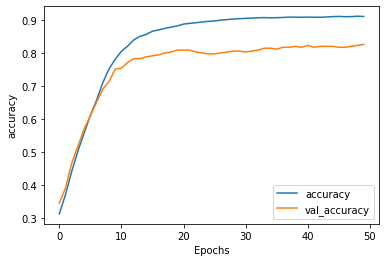

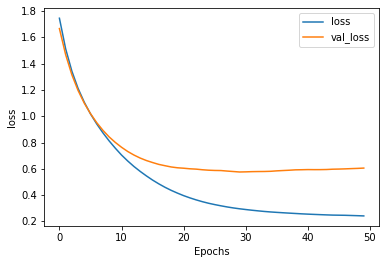

In [ ]:
plot_graphs(history_ff, "accuracy")
plot_graphs(history_ff, "loss")

In [ ]:
def create_NN_64_64_dropout(X):
  lr_model =tf.keras.Sequential()
  lr_model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu, kernel_initializer='uniform', 
                  input_dim = X.shape[1])) 
  lr_model.add(tf.keras.layers.Dropout(0.1))
  lr_model.add(tf.keras.layers.Dense(64, kernel_initializer='uniform', activation=tf.nn.relu))
  lr_model.add(tf.keras.layers.Dense(4, kernel_initializer='uniform', activation=tf.nn.softmax))

  # compile the model
  lr_model.compile(loss='categorical_crossentropy',
                optimizer="adam",
                metrics=['accuracy'])
  
  return lr_model

In [ ]:
nn_64_64 = create_NN_64_64_dropout(X_train_bi)
history_64 = nn_64_64.fit(X_train_bi, y_train_seq, epochs=50, verbose=0,batch_size=256,validation_data=(X_valid_bi, y_valid_seq), verbose=2)


In [ ]:
_, accuracy = nn_64_64.evaluate(X_test_bi, y_test_seq)
print('Accuracy: %.2f' % (accuracy*100))

99/99 [==============================] - 0s 1ms/step - loss: 0.9569 - accuracy: 0.8103
Accuracy: 81.03


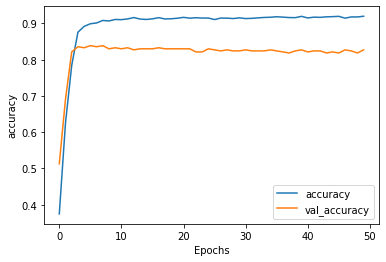

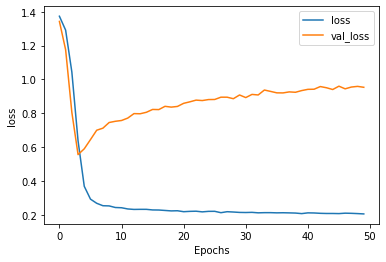

In [ ]:
plot_graphs(history_64, "accuracy")
plot_graphs(history_64, "loss")

<br>
<br>

### NN Cross Validation

In [ ]:
from keras.callbacks import History
import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from keras.optimizers import SGD
from keras.optimizers import RMSprop

In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def createNN_tuning(init_mode='uniform',drop_out=0.1, init_nodes1 =64, init_nodes2 = 64,dim = 500):
    # define model
    model = Sequential()
    model.add(Dense(init_nodes1, kernel_initializer=init_mode, activation=tf.nn.relu, input_dim=dim)) 
    model.add(Dropout(drop_out))
    model.add(Dense(init_nodes2, kernel_initializer=init_mode, activation=tf.nn.relu))
    model.add(Dense(4, kernel_initializer=init_mode, activation=tf.nn.softmax))
    # compile model
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    return model

In [ ]:
%%time
seed = 7
numpy.random.seed(seed)
batch_size = 128
epochs = 50

model_CV = KerasClassifier(build_fn=createNN_tuning,  
                           batch_size=batch_size, verbose=1,  )
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
init_nodes1 = [16,32,64,128,256]
init_nodes2 = [16,32,64,128,256]
drop_out = [0.1,0.3,0.5,0.7,0,9]
epochs = [5,10,25,50,100]

param_grid = dict(init_mode=init_mode, init_nodes1 = init_nodes1, init_nodes2 = init_nodes2, drop_out= drop_out,epochs= epochs)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_bi, y_train_seq,validation_data=(X_valid_bi, y_valid_seq))


In [ ]:
# print results
print(f'Best Accuracy for {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')

In [ ]:
_, accuracy = grid_result.evaluate(X_test_bi, y_test_seq)
print('Accuracy: %.2f' % (accuracy*100))

Best Accuracy for 0.8754538893699646 using {'drop_out': 0.7, 'init_mode': 'uniform', 'init_nodes1': 128, 'init_nodes2': 64}


In [ ]:
nn_tune= createNN_tuning(drop_out=0.7, init_mode="normal",init_nodes1=128, init_nodes2 = 64)

In [ ]:
history_tune = nn_tune.fit(X_train_bi, y_train_seq,validation_data=(X_valid_bi, y_valid_seq),verbose=0, epochs=30, batch_size=128)

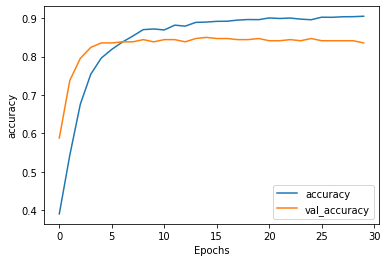

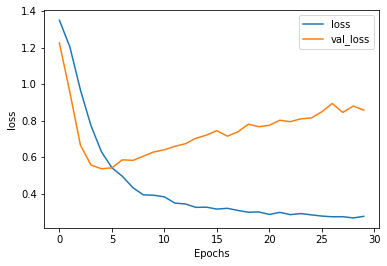

In [ ]:
plot_graphs(history_tune, "accuracy")
plot_graphs(history_tune, "loss")

In [ ]:
_, accuracy = nn_tune.evaluate(X_test_bi, y_test_seq)
print('Accuracy: %.2f' % (accuracy*100))

99/99 [==============================] - 0s 1ms/step - loss: 0.8382 - accuracy: 0.8250
Accuracy: 82.50


In [ ]:
from sklearn.metrics import f1_score
y_pred= NN_cv.predict(X_test_bi)
y_pred_enc = [np.argmax(i) for i in y_pred]
f1_score(y_test_enc, y_pred_enc, average="weighted")

0.8206489785575238

In [ ]:
f1_score_dict['NeuralNetworks'] =f1_score(y_test_enc, y_pred_enc, average="weighted")

In [ ]:
!unzip NN_cv.sav.zip 

Archive:  NN_cv.sav.zip
   creating: content/NN_cv.sav/
   creating: content/NN_cv.sav/assets/
  inflating: content/NN_cv.sav/saved_model.pb  
   creating: content/NN_cv.sav/variables/
  inflating: content/NN_cv.sav/variables/variables.index  
  inflating: content/NN_cv.sav/variables/variables.data-00000-of-00001  


In [ ]:
from keras.models import load_model
# load model
NN_cv = load_model('content/NN_cv.sav')

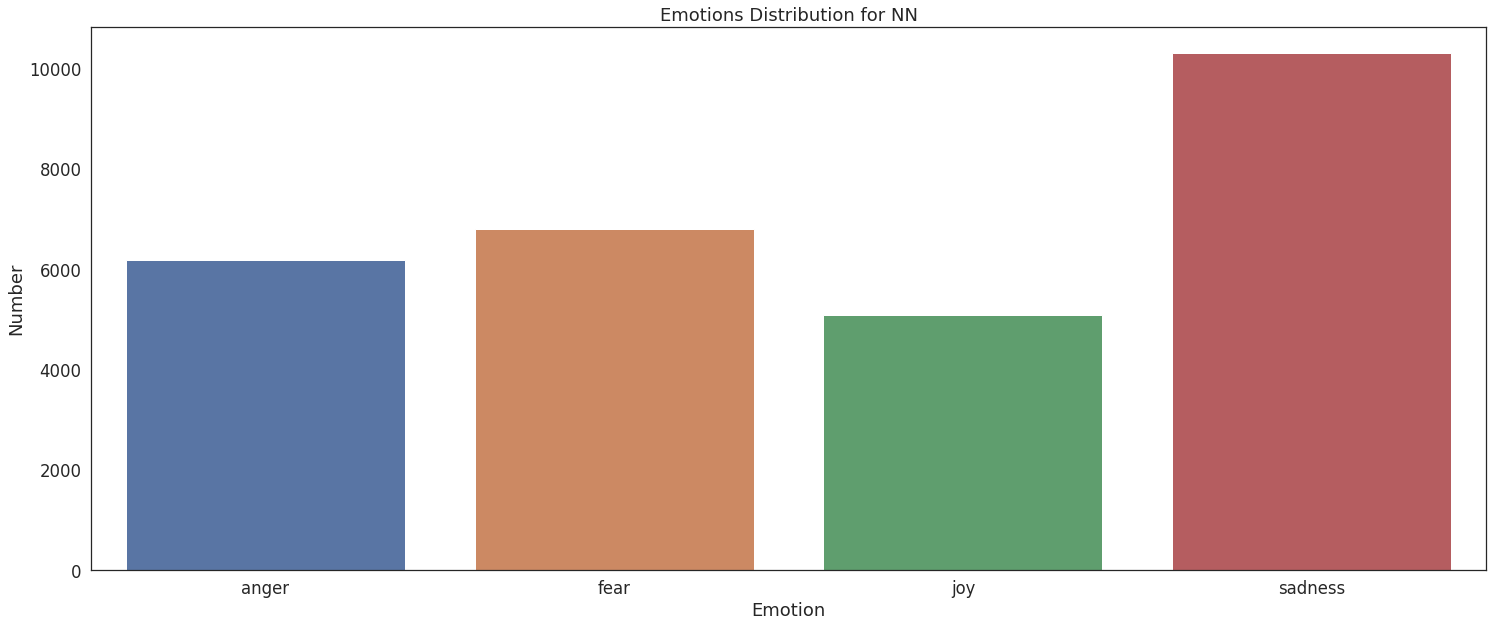

In [ ]:
songs_emotion_NN = predict_songs(NN_cv, songs, "NN")

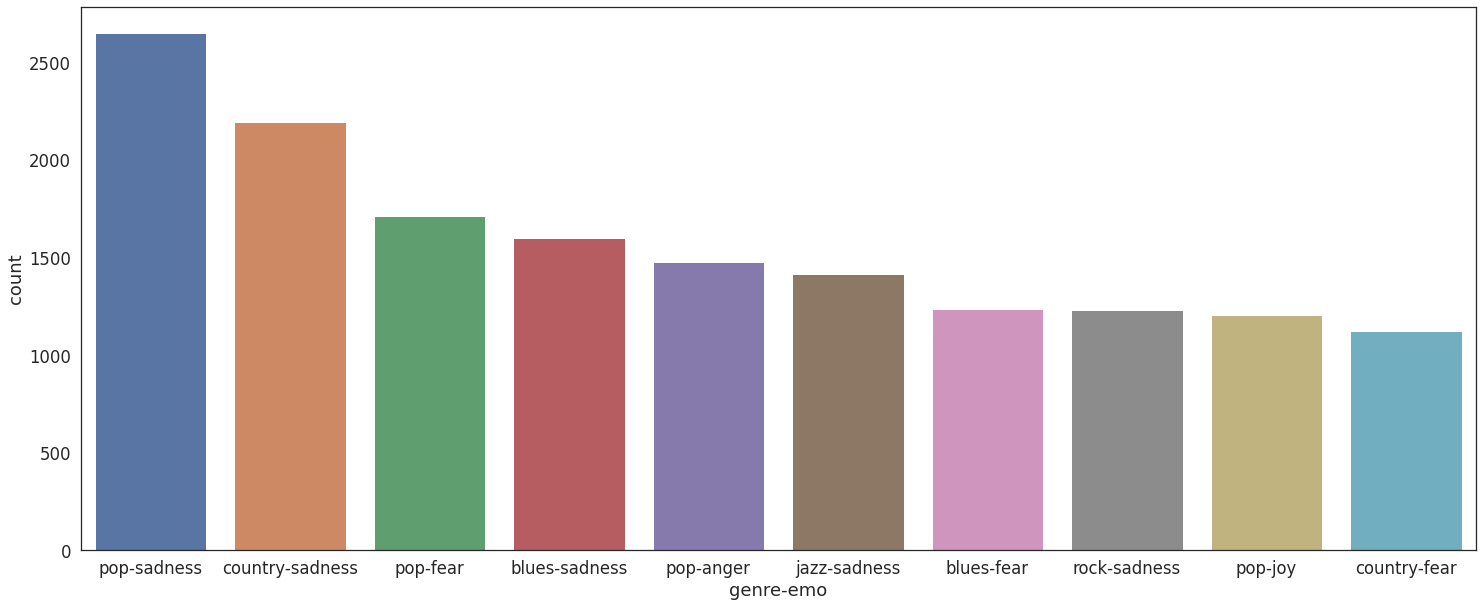

In [ ]:
get_genre_emo(songs_emotion_NN)

<br>
<br>

# **Model Testing**

In [ ]:
beatles_songs = sorted(songs_emotion_RF[songs_emotion_RF.artist_name=="the beatles"].track_name.unique())

In [ ]:
all_emotion_prediction = pd.concat([ songs_emotion_LR[['track_name','artist_name','pred']], songs_emotion_RF.pred,songs_emotion_MLP.pred, songs_emotion_NN.pred],axis=1)
all_emotion_prediction.columns = ['track_name',	'artist_name'	,'pred_LR','pred_RF','pred_MLP',	'pred_NN']

In [ ]:

import pprint
all_emotion_prediction[all_emotion_prediction.artist_name=="the beatles"].reset_index(drop=True)

,track_name,artist_name,pred_LR,pred_RF,pred_MLP,pred_NN
0,not a second time,the beatles,fear,sadness,fear,fear
1,all i've got to do,the beatles,fear,sadness,fear,fear
2,you really got a hold on me,the beatles,sadness,sadness,sadness,sadness
3,till there was you,the beatles,joy,anger,joy,joy
4,all my loving,the beatles,fear,fear,fear,fear
...,...,...,...,...,...,...
61,long tall sally,the beatles,fear,sadness,fear,fear
62,i call your name,the beatles,fear,anger,fear,fear
63,this boy,the beatles,sadness,fear,sadness,sadness
64,yes it is,the beatles,sadness,sadness,anger,sadness


<br>
<br>

# **Model results**

In [ ]:
f1_score_dict.values

{'Logistic': 0.8263058659866391,
 'MLP': 0.8031103961025209,
 'NeuralNetworks': 0.8206489785575238,
 'RandomForest': 0.8084650212209826}

In [ ]:
f1_score_dict = {k: v for k, v in sorted(f1_score_dict.items(), key=lambda item: item[1],reverse=True)}

In [ ]:
for key in f1_score_dict.keys():
  f1_score_dict[key] = [f1_score_dict[key]]

In [ ]:
model_results = pd.DataFrame.from_dict(f1_score_dict)

In [ ]:
model_results

,Logistic,NeuralNetworks,RandomForest,MLP
0,0.826306,0.820649,0.808465,0.80311


[Text(0, 0.5, 'F1 Score'),
 Text(0.5, 0, 'Model'),
 Text(0.5, 1.0, 'Best model for F1 score')]

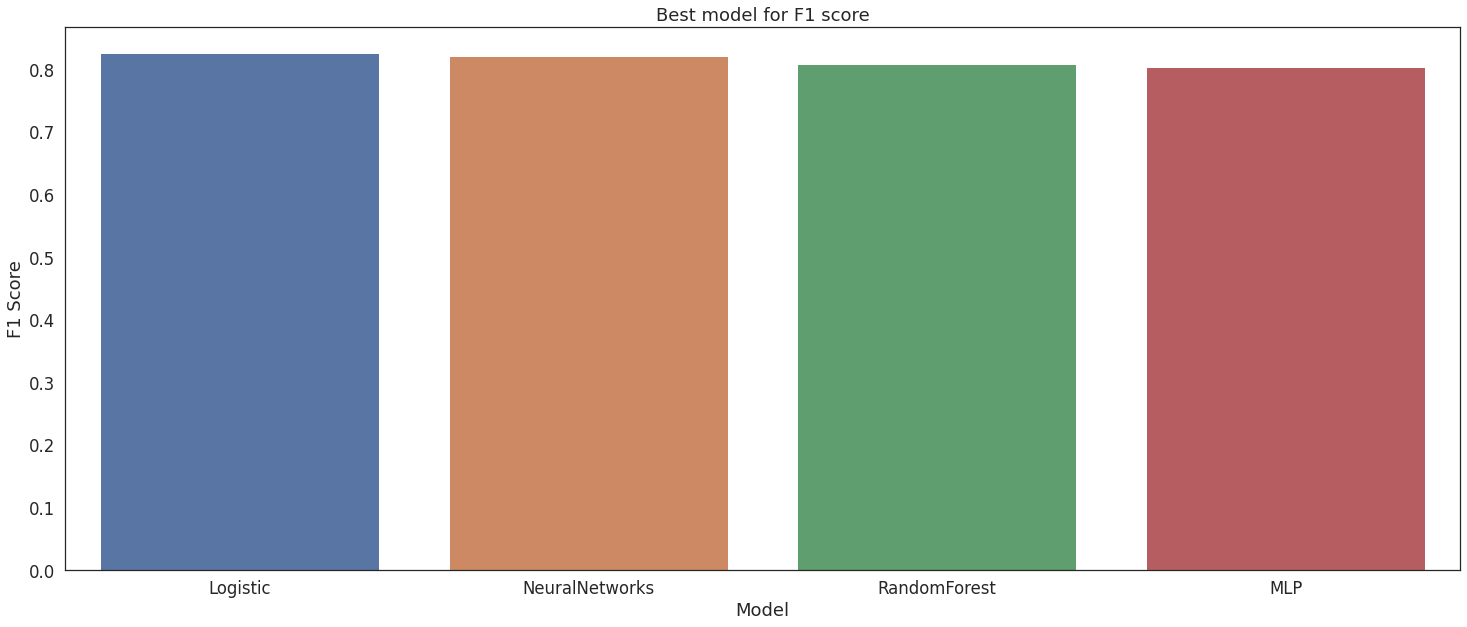

In [ ]:
sns.set(rc={'figure.figsize':(25,10)}, style="white", font_scale=1.5)
ax = sns.barplot(data=model_results)
ax.set(title = "Best model for F1 score", xlabel = "Model",  ylabel = "F1 Score")

<br>
<br>

# **Song Suggestion**

In [ ]:
def ten_random_songs(emo, genre,songs_emotion):
  all_emo = list(songs_emotion.pred.unique())
  all_genre = list(songs_emotion.genre.unique())
  if emo in all_emo and genre in all_genre:
    return songs_emotion.loc[(songs_emotion["pred"]==emo) & (songs_emotion["genre"]=="pop")].sample(n=10)[["track_name","artist_name","genre","pred"]]
  else:
    print("Insert a suitable emotion or genre \n emotions => ",all_emo," \n genre => ",all_genre)
    return None

In [ ]:
ten_random_songs("joy","pop", songs_emotion_LR)

,track_name,artist_name,genre,pred
1300,"anna lee, the healer",the beach boys,pop,joy
6807,loving is easy,rex orange county,pop,joy
284,smoke gets in your eyes,the platters,pop,joy
4008,jesus loves me,whitney houston,pop,joy
5150,it's my life,no doubt,pop,joy
6904,4th dimension,kids see ghosts,pop,joy
4941,true believers,the bouncing souls,pop,joy
2145,pay it back,elvis costello,pop,joy
6303,do my thang,miley cyrus,pop,joy
3800,all in the groove,blues traveler,pop,joy


In [ ]:
ten_random_songs("joy","pop", songs_emotion_RF)

,track_name,artist_name,genre,pred
5218,lysergic bliss,of montreal,pop,joy
402,venus,sam cooke,pop,joy
1299,"sunrise, sunset",perry como,pop,joy
2718,nightclubbing,grace jones,pop,joy
5117,what up gangsta,50 cent,pop,joy
284,smoke gets in your eyes,the platters,pop,joy
6167,dirty paws,of monsters and men,pop,joy
941,the way i feel inside,the zombies,pop,joy
4020,crank,catherine wheel,pop,joy
4555,joga,björk,pop,joy


In [ ]:
ten_random_songs("joy","pop", songs_emotion_MLP)

,track_name,artist_name,genre,pred
5647,"beautiful, dirty, rich",lady gaga,pop,joy
2001,orange juice blues,bob dylan,pop,joy
454,the more i see you,bobby darin,pop,joy
204,for the first time,the platters,pop,joy
1878,homeward bound,paul simon,pop,joy
6911,calling my spirit,kodak black,pop,joy
2717,watch your step,elvis costello & the attractions,pop,joy
748,the gypsy cried,lou christie,pop,joy
4870,freakish,saves the day,pop,joy
2365,conversation,gary numan,pop,joy


In [ ]:
ten_random_songs("joy","pop", songs_emotion_NN)

,track_name,artist_name,genre,pred
4678,ole,the bouncing souls,pop,joy
5620,so close,jon mclaughlin,pop,joy
1472,more,andy williams,pop,joy
4119,five string serenade,mazzy star,pop,joy
7027,fake smile,ariana grande,pop,joy
5273,"i need a girlpt. 2 (feat. loon, ginuwine & mar...",diddy,pop,joy
1699,evil woman,electric light orchestra,pop,joy
937,lies (are breaking my heart),the knickerbockers,pop,joy
1144,release me,engelbert humperdinck,pop,joy
816,anyone who had a heart,dionne warwick,pop,joy
